In [35]:
# import os
# import sys
# import torch
# import time

# sys.path.insert(0,os.path.abspath('/notebooks/4901_revisit_cdtran'))
# sys.path.insert(0,os.path.abspath('/notebooks/pytorchtimseries'))
# from tqdm.notebook import tqdm
# from torch_timeseries.dataset import *
# from torch_timeseries.experiments import DLinearForecast, PatchTSTForecast
# from src.experiments.CiDPG import CiDPGForecast


# # from src.experiments.iTransformer import iTransformerExp
# # exp = DLinearForecast(data_path='/notebooks/4901_revisit_cdtran/data', save_dir='/notebooks/4901_revisit_cdtran/results', device='cuda:0')
# # exp = DLinearForecast(dataset_type="ExchangeRate", data_path='/notebooks/pytorchtimseries/data', save_dir='/notebooks/pytorchtimseries/results', device='cuda:0')
# # exp = PatchTSTForecast(dataset_type="ExchangeRate", data_path='/notebooks/pytorchtimseries/data', save_dir='/notebooks/pytorchtimseries/results', device='cuda:0')
# exp = CiDPGForecast(dataset_type="Weather", windows=336, pred_len=720, start_d_model=128, end_d_model=512, patch_len=96, stride=48, data_path='/notebooks/pytorchtimseries/data', save_dir='/notebooks/4901_revisit_cdtran/results', device='cuda:0')
# # # exp.run()

# exp._setup_run(1000)
# # exp._resume_run(1000)

Using downloaded and verified file: /notebooks/pytorchtimseries/data/weather/weather.zip
Extracting /notebooks/pytorchtimseries/data/weather/weather.zip to /notebooks/pytorchtimseries/data/weather
train steps: 35832
val steps: 9820
test steps: 4551
tensor([128, 182, 238, 292, 348, 402, 458, 512], dtype=torch.int32)
self.t_index [95, 143, 191, 239, 287, 335, 383]


In [122]:

# from torch_timeseries.utils.model_stats import count_parameters
# _, np = count_parameters(exp.model)

# steps = 10
# i = 0
# self = exp
# self.model.train()
# t = 0
# for i, (
#     batch_x,
#     batch_y,
#     origin_x,
#     origin_y,
#     batch_x_date_enc,
#     batch_y_date_enc,
# ) in enumerate(self.train_loader):
#     if i >= 100:
#         break
#     i+= 1
#     origin_y = origin_y.to(self.device)
#     self.model_optim.zero_grad()
#     batch_x = batch_x.to(self.device)
#     batch_y = batch_y.to(self.device)
#     batch_x_date_enc = batch_x_date_enc.to(self.device)
#     batch_y_date_enc = batch_y_date_enc.to(self.device)
#     start = time.time()
#     start_memory = torch.cuda.memory_allocated()
    
#     pred, true = self._process_one_batch(
#         batch_x, batch_y, batch_x_date_enc, batch_y_date_enc
#     )
#     loss = self.loss_func(pred, true)
#     loss.backward()

#     end_memory = torch.cuda.max_memory_allocated()
#     print(f"memory1 : {(end_memory - start_memory) / 1024**2:.2f}MB")
#     # print(f"t : {time.time() - start}")


#     t += time.time() - start
    
# print(f"t : {t/i*1000}, np: {np}")




In [ ]:
# from torch.utils.data import DataLoader
# batch_x, batch_y, origin_x, origin_y, batch_x_date_enc, batch_y_date_enc = map(lambda x: x.to(exp.device).float(), next(iter(exp.test_loader)))


In [123]:
# start_memory = torch.cuda.memory_allocated()
# start_time = time.time()
# outputs, batch_y = exp._process_one_batch(batch_x, batch_y, batch_x_date_enc, batch_y_date_enc)
# end_time = time.time()
# end_memory = torch.cuda.max_memory_allocated()
# memory_increase = end_memory - start_memory
# print(f"Memory increased by: {memory_increase / 1024**2:.2f}MB, inference time: {(end_time-start_time)}s")


In [15]:
max_memory

13125632

In [24]:
end_memory

11207680

# 1 Profile

## Main

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.font_manager as fm
from matplotlib import font_manager, rcParams

df_all = pd.read_csv('./profile.csv')
df_all.set_index(['dataset', 'model'], inplace=True)
df_all = df_all.sort_index()
df_all['parameters'] = df_all['parameters']/(1000)
df_all[ 'peak_memory'] = df_all[ 'peak_memory']/(1024**2)
df_all[ 'lowmem'] = df_all[ 'lowmem']/(1024**2)
df_all

peak_memory      lowmem  traintime  parameters    MAE
dataset model                                                              
ETTh1   CATS            15.865723   14.654297   7.829773    1404.640  0.591
        Crossformer    195.995605  194.520996  52.060318   12872.984  0.705
        DLinear          1.919922    1.861328   0.904799     485.280  0.570
        Informer        90.717285   90.717285  35.418713    6607.879  0.919
        PAN             27.098633   10.790039  15.075278    2692.816  0.558
...                           ...         ...        ...         ...    ...
Weather PAN             14.423828   14.249512   6.943715    3543.888  0.298
        PatchTST       122.131836  120.957520   7.459509   18648.784  0.299
        SCINet           3.087891    2.913574  63.105905     341.922  0.307
        TSMixer          4.593262    4.418945  17.736185    1155.888  0.439
        iTransformer    50.990723   50.816406   9.705341   13152.464  0.303

[72 rows x 5 columns]

### ETTh1

### ETTh2

In [3]:
df = df_all.loc['ETTh2'].transpose()
# df = df_filtered.loc['ETTh1'].transpose()
x = df.iloc[2, :] # iter time
y = df.iloc[4, :] # MSE, MAE
s = df.iloc[0, :] # memory
# 绘制气泡图
df

model,CATS,Crossformer,DLinear,Informer,PAN,PatchTST,SCINet,TSMixer,iTransformer
peak_memory,15.865723,195.995605,1.919922,90.717285,14.214844,81.786133,2.296387,4.456543,50.845215
lowmem,14.654297,194.520996,1.861328,90.717285,14.156250,81.727539,2.237793,4.397949,50.786621
traintime,12.271845,70.149374,0.948858,37.662160,6.455876,10.902374,71.817648,15.130019,15.772250
parameters,1404.640000,12872.984000,485.280000,6607.879000,3540.304000,18648.784000,253.302000,1149.392000,13152.464000
MAE,0.348000,0.455000,0.304000,0.450000,0.289000,0.317000,0.346000,0.469000,0.303000


findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not found.


findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not

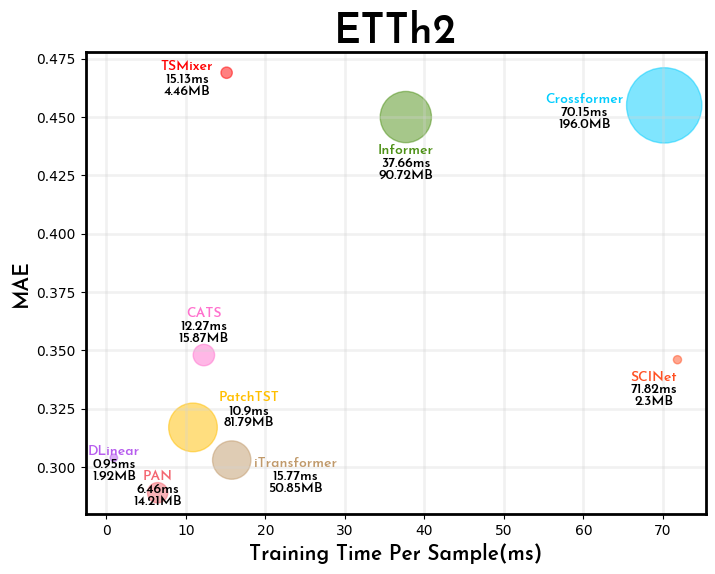

In [9]:


# Path to your TTF font file
font_path = '/notebooks/pytorch_timeseries/notebooks/trials/fonts/JosefinSans-Regular.ttf'
font_path = '/notebooks/pytorch_timeseries/notebooks/trials/fonts/JosefinSans-SemiBold.ttf'
# font_path = '/notebooks/pytorch_timeseries/notebooks/trials/fonts/PoetsenOne-Regular.ttf'
# Load the font
font_prop = font_manager.FontProperties(fname=font_path)

# Set the global font properties
rcParams['font.family'] = font_prop.get_name()
# # Set the font properties for various elements globally
# plt.rcParams['font.family'] = font_prop.get_name()
# plt.rcParams['font.sans-serif'] = [font_prop.get_name()]
# plt.rcParams['font.serif'] = [font_prop.get_name()]
# plt.rcParams['font.monospace'] = [font_prop.get_name()]

colors = [
"#ff71ce",
"#01cdfe",
"#b75dee",
"#4e9117",
"#f46671",
"#FFBF00",
"#ff5124",
"#ff0203",
"#C19A6B",
]
plt.rcParams['axes.linewidth'] = 2

plt.figure(figsize=(8, 6))
# plt.yscale('log') 
# plt.xscale('log') 
plt.scatter(x, y, s=s*15,  c=colors, alpha=0.5)


offsets = [
    (0,0.015), # CATS
    (-10,0), # Crossformer
    (0,0), # DLinear
    (0,-0.017), # Informer
    (0,0.0043), # PAN
    (7,0.01), # PatchTST
    (-3,-0.01), # SCINet
    (-5,0), # TSMixer
    (8,-0.0043), # iTransformer

]

# yticks = [0.55,0.553 ,0.558, 0.56, 0.6]
# plt.yticks(yticks)

# # 添加标签
# for i, label in enumerate(df.keys()):
#     plt.annotate(f"{label}".format(), (x[i], y[i]), xytext=(x[i]+offsets[i][0], y[i]+s[i]/80+offsets[i][1]), c=colors[i], va='bottom', ha='center', fontproperties=font_prop)
for i, label in enumerate(df.keys()):
    plt.annotate(f"{label}".format(), (x[i], y[i]), xytext=(x[i]+offsets[i][0], y[i]+offsets[i][1]), c=colors[i], va='bottom', ha='center', fontproperties=font_prop)

# for i, label in enumerate(df.keys()):
#     plt.annotate(f"{round(df.iloc[1, :][i],2)}GB, {round(df.iloc[2, :][i],2)}ms".format(), (x[i], y[i]), xytext=(x[i]+offsets[i][0], y[i]+s[i]/80+offsets[i][1]), c='black', va='top', ha='center', fontproperties=font_prop)
for i, label in enumerate(df.keys()):
    plt.annotate(f"{round(s[i],2)}MB".format(), (x[i], y[i]), xytext=(x[i]+offsets[i][0], y[i]-0.005+offsets[i][1]), c='black', va='top', ha='center', fontproperties=font_prop)
    
for i, label in enumerate(df.keys()):
    plt.annotate(f"{round(x[i],2)}ms".format(), (x[i], y[i]), xytext=(x[i]+offsets[i][0], y[i]+offsets[i][1]), c='black', va='top', ha='center', fontproperties=font_prop)

title_font_prop = font_manager.FontProperties(size=30, fname=font_path)
    
# 添加标题和坐标轴标签
plt.title('ETTh2', fontproperties=title_font_prop)
plt.xlabel('Training Time Per Sample(ms)', fontsize=15, fontproperties=font_prop)
plt.ylabel('MAE', fontsize=15, fontproperties=font_prop)
# plt.grid(True)
plt.grid(which='major', axis='both', linestyle='-', alpha=0.3, color='lightgray', linewidth=2)
plt.savefig('./ETTh2.svg', bbox_inches='tight')
# 显示图表
plt.show()



### ETTm1

In [10]:
dataset = 'ETTm1'
df = df_all.loc[dataset].transpose()
# df = df_filtered.loc['ETTh1'].transpose()
x = df.iloc[2, :] # iter time
y = df.iloc[4, :] # MSE, MAE
s = df.iloc[0, :] # memory
# 绘制气泡图
df

model,CATS,Crossformer,DLinear,Informer,PAN,PatchTST,SCINet,TSMixer,iTransformer
peak_memory,15.865723,195.995605,1.919922,90.720703,14.214844,81.786133,2.296387,4.456543,50.848633
lowmem,14.654297,194.520996,1.861328,90.720703,14.156250,81.727539,2.237793,4.397949,50.790039
traintime,11.130762,70.704651,0.831783,28.491044,7.936370,5.902433,74.262762,21.253574,10.215306
parameters,1404.640000,12872.984000,485.280000,6608.903000,3540.304000,18648.784000,253.302000,1149.392000,13152.464000
MAE,0.471000,0.506000,0.480000,0.754000,0.466000,0.466000,0.511000,0.517000,0.471000


findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not

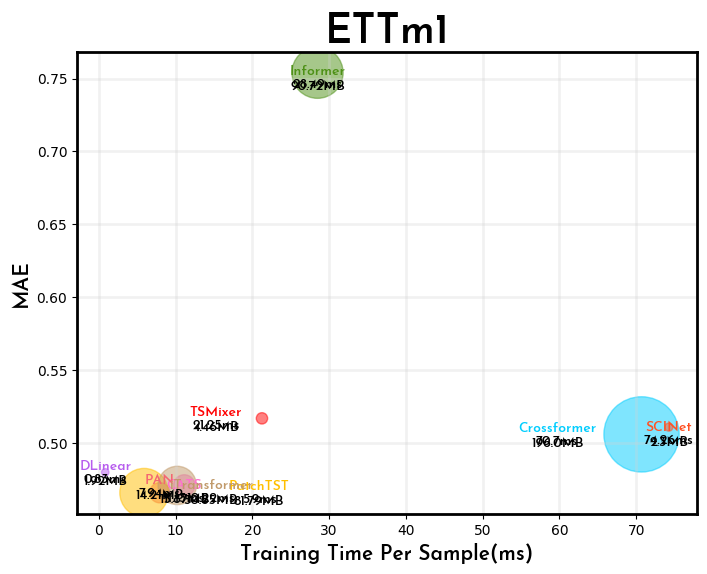

In [11]:


# Path to your TTF font file
font_path = '/notebooks/pytorch_timeseries/notebooks/trials/fonts/JosefinSans-Regular.ttf'
font_path = '/notebooks/pytorch_timeseries/notebooks/trials/fonts/JosefinSans-SemiBold.ttf'
# font_path = '/notebooks/pytorch_timeseries/notebooks/trials/fonts/PoetsenOne-Regular.ttf'
# Load the font
# font_prop = font_manager.FontProperties(fname=font_path)

# Set the global font properties
# rcParams['font.family'] = font_prop.get_name()
# # Set the font properties for various elements globally
# plt.rcParams['font.family'] = font_prop.get_name()
# plt.rcParams['font.sans-serif'] = [font_prop.get_name()]
# plt.rcParams['font.serif'] = [font_prop.get_name()]
# plt.rcParams['font.monospace'] = [font_prop.get_name()]

colors = [
"#ff71ce",
"#01cdfe",
"#b75dee",
"#4e9117",
"#f46671",
"#FFBF00",
"#ff5124",
"#ff0203",
"#C19A6B",
]
plt.rcParams['axes.linewidth'] = 2

plt.figure(figsize=(8, 6))
# plt.yscale('log') 
# plt.xscale('log') 
plt.scatter(x, y, s=s*15,  c=colors, alpha=0.5)


offsets = [
    (0,-0.004), # CATS
    (-11,0), # Crossformer
    (0,0), # DLinear
    (0,-0.0036), # Informer
    (0,0.0043), # PAN
    (15,0), # PatchTST
    (0,-0.0045), # SCINet
    (-6,0), # TSMixer
    (4.4,-0.0043), # iTransformer

]

# yticks = [0.55,0.553 ,0.558, 0.56, 0.6]
# plt.yticks(yticks)

# # 添加标签
# for i, label in enumerate(df.keys()):
#     plt.annotate(f"{label}".format(), (x[i], y[i]), xytext=(x[i]+offsets[i][0], y[i]+s[i]/80+offsets[i][1]), c=colors[i], va='bottom', ha='center', fontproperties=font_prop)
for i, label in enumerate(df.keys()):
    plt.annotate(f"{label}".format(), (x[i], y[i]), xytext=(x[i]+offsets[i][0], y[i]+offsets[i][1]), c=colors[i], va='bottom', ha='center', fontproperties=font_prop)

# for i, label in enumerate(df.keys()):
#     plt.annotate(f"{round(df.iloc[1, :][i],2)}GB, {round(df.iloc[2, :][i],2)}ms".format(), (x[i], y[i]), xytext=(x[i]+offsets[i][0], y[i]+s[i]/80+offsets[i][1]), c='black', va='top', ha='center', fontproperties=font_prop)
for i, label in enumerate(df.keys()):
    plt.annotate(f"{round(s[i],2)}MB".format(), (x[i], y[i]), xytext=(x[i]+offsets[i][0], y[i]-0.0013+offsets[i][1]), c='black', va='top', ha='center', fontproperties=font_prop)
    
for i, label in enumerate(df.keys()):
    plt.annotate(f"{round(x[i],2)}ms".format(), (x[i], y[i]), xytext=(x[i]+offsets[i][0], y[i]+offsets[i][1]), c='black', va='top', ha='center', fontproperties=font_prop)

title_font_prop = font_manager.FontProperties(size=30, fname=font_path)
# 添加标题和坐标轴标签
plt.title(dataset, fontproperties=title_font_prop)

plt.xlabel('Training Time Per Sample(ms)', fontsize=15, fontproperties=font_prop)
plt.ylabel('MAE', fontsize=15, fontproperties=font_prop)
# plt.grid(True)
plt.grid(which='major', axis='both', linestyle='-', alpha=0.3, color='lightgray', linewidth=2)
plt.savefig(f'./{dataset}.svg')
# 显示图表
plt.show()



### ETTm2

In [283]:
dataset = 'ETTm2'
df = df_all.loc[dataset].transpose()
# df = df_filtered.loc['ETTh1'].transpose()
x = df.iloc[2, :] # iter time
y = df.iloc[4, :] # MSE, MAE
s = df.iloc[0, :] # memory
# 绘制气泡图
df

model,CATS,Crossformer,DLinear,Informer,PAN,PatchTST,SCINet,TSMixer,iTransformer
peak_memory,15.865723,195.995605,1.919922,90.720703,12.100098,81.786133,2.296387,4.456543,50.848633
lowmem,14.654297,194.520996,1.861328,90.720703,12.041504,81.727539,2.237793,4.397949,50.790039
traintime,11.092353,67.798388,0.983262,35.099947,7.163918,5.368602,79.431295,12.265801,8.895981
parameters,1404.640000,12872.984000,485.280000,6608.903000,3155.024000,18648.784000,253.302000,1149.392000,13152.464000
MAE,0.302000,0.320000,0.267000,0.353000,0.264000,0.265000,0.274000,0.334000,0.270000


findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not

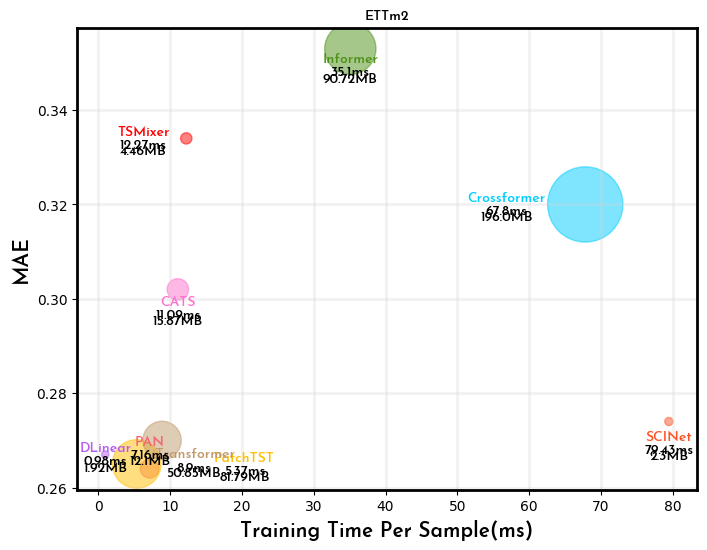

In [284]:


# Path to your TTF font file
font_path = '/notebooks/pytorch_timeseries/notebooks/trials/fonts/JosefinSans-Regular.ttf'
font_path = '/notebooks/pytorch_timeseries/notebooks/trials/fonts/JosefinSans-SemiBold.ttf'
# font_path = '/notebooks/pytorch_timeseries/notebooks/trials/fonts/PoetsenOne-Regular.ttf'
# Load the font
# font_prop = font_manager.FontProperties(fname=font_path)

# Set the global font properties
# rcParams['font.family'] = font_prop.get_name()
# # Set the font properties for various elements globally
# plt.rcParams['font.family'] = font_prop.get_name()
# plt.rcParams['font.sans-serif'] = [font_prop.get_name()]
# plt.rcParams['font.serif'] = [font_prop.get_name()]
# plt.rcParams['font.monospace'] = [font_prop.get_name()]

colors = [
"#ff71ce",
"#01cdfe",
"#b75dee",
"#4e9117",
"#f46671",
"#FFBF00",
"#ff5124",
"#ff0203",
"#C19A6B",
]
plt.rcParams['axes.linewidth'] = 2

plt.figure(figsize=(8, 6))
# plt.yscale('log') 
# plt.xscale('log') 
plt.scatter(x, y, s=s*15,  c=colors, alpha=0.5)


offsets = [
    (0,-0.004), # CATS
    (-11,0), # Crossformer
    (0,0), # DLinear
    (0,-0.0036), # Informer
    (0,0.0043), # PAN
    (15,0), # PatchTST
    (0,-0.0045), # SCINet
    (-6,0), # TSMixer
    (4.4,-0.0043), # iTransformer

]

# yticks = [0.55,0.553 ,0.558, 0.56, 0.6]
# plt.yticks(yticks)

# # 添加标签
# for i, label in enumerate(df.keys()):
#     plt.annotate(f"{label}".format(), (x[i], y[i]), xytext=(x[i]+offsets[i][0], y[i]+s[i]/80+offsets[i][1]), c=colors[i], va='bottom', ha='center', fontproperties=font_prop)
for i, label in enumerate(df.keys()):
    plt.annotate(f"{label}".format(), (x[i], y[i]), xytext=(x[i]+offsets[i][0], y[i]+offsets[i][1]), c=colors[i], va='bottom', ha='center', fontproperties=font_prop)

# for i, label in enumerate(df.keys()):
#     plt.annotate(f"{round(df.iloc[1, :][i],2)}GB, {round(df.iloc[2, :][i],2)}ms".format(), (x[i], y[i]), xytext=(x[i]+offsets[i][0], y[i]+s[i]/80+offsets[i][1]), c='black', va='top', ha='center', fontproperties=font_prop)
for i, label in enumerate(df.keys()):
    plt.annotate(f"{round(s[i],2)}MB".format(), (x[i], y[i]), xytext=(x[i]+offsets[i][0], y[i]-0.0013+offsets[i][1]), c='black', va='top', ha='center', fontproperties=font_prop)
    
for i, label in enumerate(df.keys()):
    plt.annotate(f"{round(x[i],2)}ms".format(), (x[i], y[i]), xytext=(x[i]+offsets[i][0], y[i]+offsets[i][1]), c='black', va='top', ha='center', fontproperties=font_prop)

    
# 添加标题和坐标轴标签
plt.title(dataset, fontsize=15, fontproperties=font_prop)
plt.xlabel('Training Time Per Sample(ms)', fontsize=15, fontproperties=font_prop)
plt.ylabel('MAE', fontsize=15, fontproperties=font_prop)
# plt.grid(True)
plt.grid(which='major', axis='both', linestyle='-', alpha=0.3, color='lightgray', linewidth=2)
plt.savefig(f'./{dataset}.svg')
# 显示图表
plt.show()



### Electricity

In [50]:
dataset = 'Electricity'
df = df_all.loc[dataset].transpose()

# 删除第二级索引值为 'Informer' 的行
df = df.drop(columns=['Crossformer'])

# df = df_filtered.loc['ETTh1'].transpose()
x = df.iloc[2, :] # iter time
y = df.iloc[4, :] # MSE, MAE
s = df.iloc[0, :] # memory
# 绘制气泡图
df

model,CATS,DLinear,Informer,PAN,PatchTST,SCINet,TSMixer,iTransformer
peak_memory,698.649902,4.909180,94.14209,13.517090,949.551270,94.205078,35.802246,93.398926
lowmem,642.270508,3.468750,94.14209,12.059570,946.905762,91.559570,33.156738,90.753418
traintime,11.047435,1.192904,35.29985,4.280305,10.535549,72.087169,16.805732,17.268670
parameters,1404.640000,485.280000,7734.59300,1919.568000,18648.784000,23341.722000,2802.288000,13152.464000
MAE,0.310000,0.305000,0.40500,0.295000,0.296000,0.294000,0.299000,0.305000


findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not found.


findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not

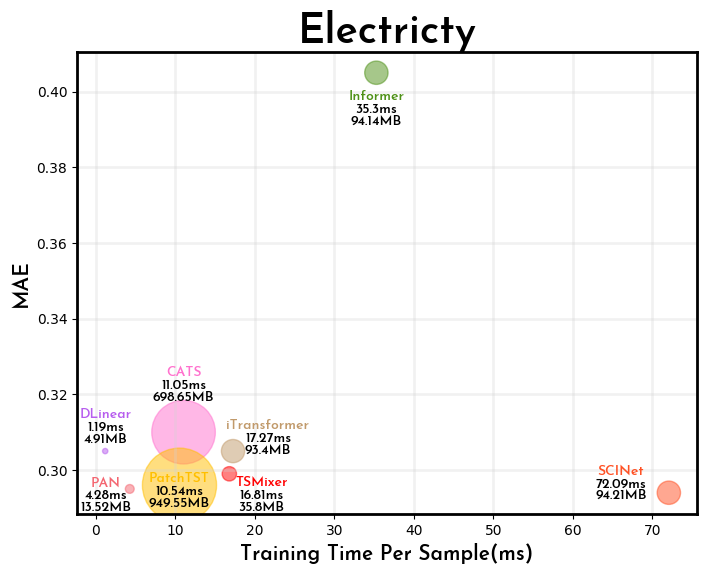

In [51]:


# Path to your TTF font file
font_path = '/notebooks/pytorch_timeseries/notebooks/trials/fonts/JosefinSans-Regular.ttf'
font_path = '/notebooks/pytorch_timeseries/notebooks/trials/fonts/JosefinSans-SemiBold.ttf'
# font_path = '/notebooks/pytorch_timeseries/notebooks/trials/fonts/PoetsenOne-Regular.ttf'
# Load the font
# font_prop = font_manager.FontProperties(fname=font_path)

# Set the global font properties
# rcParams['font.family'] = font_prop.get_name()
# # Set the font properties for various elements globally
# plt.rcParams['font.family'] = font_prop.get_name()
# plt.rcParams['font.sans-serif'] = [font_prop.get_name()]
# plt.rcParams['font.serif'] = [font_prop.get_name()]
# plt.rcParams['font.monospace'] = [font_prop.get_name()]

colors = [
"#ff71ce",
# "#01cdfe",
"#b75dee",
"#4e9117",
"#f46671",
"#FFBF00",
"#ff5124",
"#ff0203",
"#C19A6B",
]
plt.rcParams['axes.linewidth'] = 2

plt.figure(figsize=(8, 6))
# plt.yscale('log') 
# plt.xscale('log') 
plt.scatter(x, y, s=s*3,  c=colors, alpha=0.5)


offsets = [
    # (0,0), # CATS
    # (0,0), # CATS
    # (0,0), # CATS
    # # (0,0), # CATS
    # (0,0), # CATS
    # (0,0), # CATS
    # (0,0), # CATS
    # (0,0), # CATS
    (0,0.014), # CATS
    # (-11,0), # Crossformer
    (0, 0.008), # DLinear
    (0,-0.008), # Informer
    (-3,-0.000), # PAN
    (0,0), # PatchTST
    (-6,0.004), # SCINet
    (4,-0.004), # TSMixer
    (4.4,0.005), # iTransformer

]

# yticks = [0.55,0.553 ,0.558, 0.56, 0.6]
# plt.yticks(yticks)
# xticks= [10,20,30,40,50,60,70]
# plt.xticks(xticks)
# yticks= [0.3, 0.32, 0.34, 0.36, 0.38, 0.4]
# plt.xticks(yticks)
# plt.xlim(0, 75)
# plt.ylim(0.25, 0.5)
# # 添加标签
# for i, label in enumerate(df.keys()):
#     plt.annotate(f"{label}".format(), (x[i], y[i]), xytext=(x[i]+offsets[i][0], y[i]+s[i]/80+offsets[i][1]), c=colors[i], va='bottom', ha='center', fontproperties=font_prop)
for i, label in enumerate(df.keys()):
    plt.annotate(f"{label}".format(), (x[i], y[i]), xytext=(x[i]+offsets[i][0], y[i]+offsets[i][1]), c=colors[i], va='bottom', ha='center', fontproperties=font_prop)

# for i, label in enumerate(df.keys()):
#     plt.annotate(f"{round(df.iloc[1, :][i],2)}GB, {round(df.iloc[2, :][i],2)}ms".format(), (x[i], y[i]), xytext=(x[i]+offsets[i][0], y[i]+s[i]/80+offsets[i][1]), c='black', va='top', ha='center', fontproperties=font_prop)
for i, label in enumerate(df.keys()):
    plt.annotate(f"{round(s[i],2)}MB".format(), (x[i], y[i]), xytext=(x[i]+offsets[i][0], y[i]-0.003+offsets[i][1]), c='black', va='top', ha='center', fontproperties=font_prop)
    
for i, label in enumerate(df.keys()):
    plt.annotate(f"{round(x[i],2)}ms".format(), (x[i], y[i]), xytext=(x[i]+offsets[i][0], y[i]+offsets[i][1]), c='black', va='top', ha='center', fontproperties=font_prop)

# 添加标题和坐标轴标签
plt.title('Electricty', fontproperties=title_font_prop)
plt.xlabel('Training Time Per Sample(ms)', fontsize=15, fontproperties=font_prop)
plt.ylabel('MAE', fontsize=15, fontproperties=font_prop)
# plt.grid(True)
plt.grid(which='major', axis='both', linestyle='-', alpha=0.3, color='lightgray', linewidth=2)
plt.savefig(f'./{dataset}.svg', bbox_inches='tight')
# 显示图表
plt.show()



<function matplotlib.pyplot.xticks(ticks=None, labels=None, *, minor=False, **kwargs)>

### Traffic

In [24]:
dataset = 'Traffic'
df = df_all.loc[dataset].transpose()

df = df.drop(columns=['Crossformer'])

# df = df_filtered.loc['ETTh1'].transpose()
x = df.iloc[2, :] # iter time
y = df.iloc[4, :] # MSE, MAE
s = df.iloc[0, :] # memory
# 绘制气泡图
df

model,CATS,DLinear,Informer,PAN,PatchTST,SCINet,TSMixer,iTransformer
peak_memory,1873.057129,10.407227,100.104492,45.757812,2455.064941,650.354004,98.735840,363.650879
lowmem,1722.775879,9.392090,98.470703,43.260254,2430.010742,641.377441,91.820312,354.461426
traintime,13.046074,1.738977,43.591595,5.581462,33.139992,77.403390,12.935078,23.182034
parameters,1404.640000,485.280000,9672.030000,2911.696000,18648.784000,166733.772000,13050.992000,13152.464000
MAE,0.412000,0.375000,0.489000,0.364000,0.365000,0.381000,0.404000,0.379000


findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not found.


findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not

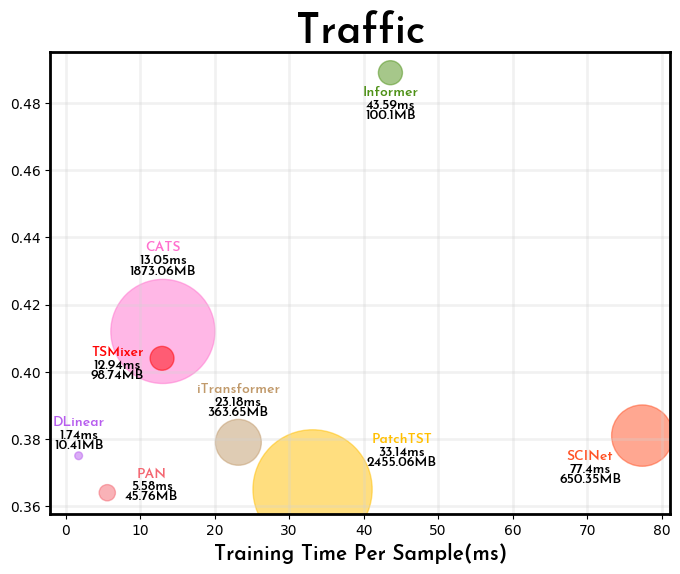

In [26]:


# Path to your TTF font file
font_path = '/notebooks/pytorch_timeseries/notebooks/trials/fonts/JosefinSans-Regular.ttf'
font_path = '/notebooks/pytorch_timeseries/notebooks/trials/fonts/JosefinSans-SemiBold.ttf'
# font_path = '/notebooks/pytorch_timeseries/notebooks/trials/fonts/PoetsenOne-Regular.ttf'
# Load the font
# font_prop = font_manager.FontProperties(fname=font_path)

# Set the global font properties
# rcParams['font.family'] = font_prop.get_name()
# # Set the font properties for various elements globally
# plt.rcParams['font.family'] = font_prop.get_name()
# plt.rcParams['font.sans-serif'] = [font_prop.get_name()]
# plt.rcParams['font.serif'] = [font_prop.get_name()]
# plt.rcParams['font.monospace'] = [font_prop.get_name()]

colors = [
"#ff71ce",
# "#01cdfe",
"#b75dee",
"#4e9117",
"#f46671",
"#FFBF00",
"#ff5124",
"#ff0203",
"#C19A6B",
]
plt.rcParams['axes.linewidth'] = 2

plt.figure(figsize=(8, 6))
# plt.yscale('log') 
# plt.xscale('log') 
plt.scatter(x, y, s=s*3,  c=colors, alpha=0.5)


offsets = [
    # (0,0), # CATS
    # (0,0), # CATS
    # (0,0), # CATS
    # (0,0), # CATS
    # (0,0), # CATS
    # (0,0), # CATS
    # (0,0), # CATS
    # (0,0), # CATS
    (0,0.023), # CATS
    # (-11,0), # Crossformer
    (0,0.008), # DLinear
    (0,-0.0078), # Informer
    (6,0.0038), # PAN
    (12,0.013), # PatchTST
    (-7,-0.008), # SCINet
    (-6,0), # TSMixer
    (0,0.014), # iTransformer

]

# yticks = [0.55,0.553 ,0.558, 0.56, 0.6]
# plt.yticks(yticks)

# # 添加标签
# for i, label in enumerate(df.keys()):
#     plt.annotate(f"{label}".format(), (x[i], y[i]), xytext=(x[i]+offsets[i][0], y[i]+s[i]/80+offsets[i][1]), c=colors[i], va='bottom', ha='center', fontproperties=font_prop)
for i, label in enumerate(df.keys()):
    plt.annotate(f"{label}".format(), (x[i], y[i]), xytext=(x[i]+offsets[i][0], y[i]+offsets[i][1]), c=colors[i], va='bottom', ha='center', fontproperties=font_prop)

# for i, label in enumerate(df.keys()):
#     plt.annotate(f"{round(df.iloc[1, :][i],2)}GB, {round(df.iloc[2, :][i],2)}ms".format(), (x[i], y[i]), xytext=(x[i]+offsets[i][0], y[i]+s[i]/80+offsets[i][1]), c='black', va='top', ha='center', fontproperties=font_prop)
for i, label in enumerate(df.keys()):
    plt.annotate(f"{round(s[i],2)}MB".format(), (x[i], y[i]), xytext=(x[i]+offsets[i][0], y[i]-0.003+offsets[i][1]), c='black', va='top', ha='center', fontproperties=font_prop)
    
for i, label in enumerate(df.keys()):
    plt.annotate(f"{round(x[i],2)}ms".format(), (x[i], y[i]), xytext=(x[i]+offsets[i][0], y[i]+offsets[i][1]), c='black', va='top', ha='center', fontproperties=font_prop)

    
# 添加标题和坐标轴标签
plt.title(dataset, fontproperties=title_font_prop)
plt.xlabel('Training Time Per Sample(ms)', fontsize=15, fontproperties=font_prop)
# plt.ylabel('MAE', fontsize=15, fontproperties=font_prop)
# plt.grid(True)
plt.grid(which='major', axis='both', linestyle='-', alpha=0.3, color='lightgray', linewidth=2)
plt.savefig(f'./{dataset}.svg', bbox_inches='tight')
# 显示图表
plt.show()



### ExchangeRate

In [12]:
dataset = 'ExchangeRate'
df = df_all.loc[dataset].transpose()
# df = df_filtered.loc['ETTh1'].transpose()
x = df.iloc[2, :] # iter time
y = df.iloc[4, :] # MSE, MAE
s = df.iloc[0, :] # memory
# 绘制气泡图
df

model,CATS,Crossformer,DLinear,Informer,PAN,PatchTST,SCINet,TSMixer,iTransformer
peak_memory,17.979980,219.260742,1.928223,90.724609,14.229004,84.307129,2.339844,4.463379,50.850098
lowmem,16.595703,219.238281,1.862305,90.724609,14.163086,84.241211,2.273926,4.397461,50.784180
traintime,8.353174,55.282211,0.785005,33.619320,5.221176,8.311584,71.665454,13.142741,10.089743
parameters,1404.640000,12918.040000,485.280000,6610.440000,3540.560000,18648.784000,256.720000,1149.648000,13152.464000
MAE,0.641000,0.885000,0.710000,1.059000,0.461000,0.527000,0.748000,1.014000,0.970000


findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not found.


findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not

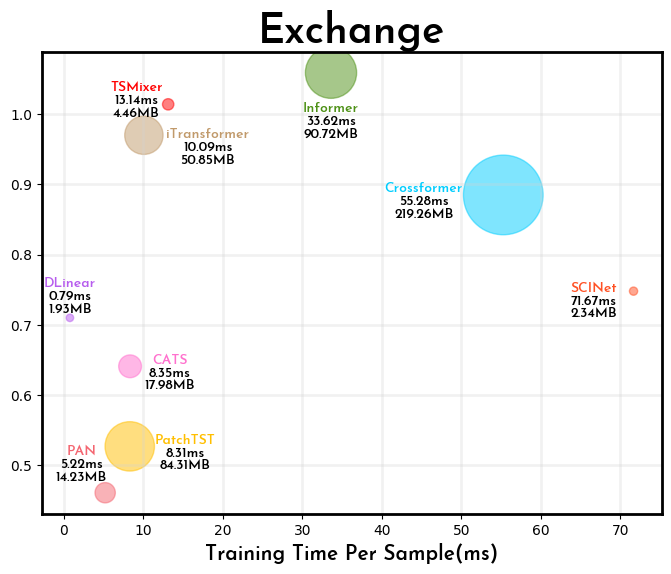

In [15]:


# Path to your TTF font file
font_path = '/notebooks/pytorch_timeseries/notebooks/trials/fonts/JosefinSans-Regular.ttf'
font_path = '/notebooks/pytorch_timeseries/notebooks/trials/fonts/JosefinSans-SemiBold.ttf'
# font_path = '/notebooks/pytorch_timeseries/notebooks/trials/fonts/PoetsenOne-Regular.ttf'
# Load the font
# font_prop = font_manager.FontProperties(fname=font_path)

# Set the global font properties
# rcParams['font.family'] = font_prop.get_name()
# # Set the font properties for various elements globally
# plt.rcParams['font.family'] = font_prop.get_name()
# plt.rcParams['font.sans-serif'] = [font_prop.get_name()]
# plt.rcParams['font.serif'] = [font_prop.get_name()]
# plt.rcParams['font.monospace'] = [font_prop.get_name()]

colors = [
"#ff71ce",
"#01cdfe",
"#b75dee",
"#4e9117",
"#f46671",
"#FFBF00",
"#ff5124",
"#ff0203",
"#C19A6B",
]
plt.rcParams['axes.linewidth'] = 2

plt.figure(figsize=(8, 6))
# plt.yscale('log') 
# plt.xscale('log') 
plt.scatter(x, y, s=s*15,  c=colors, alpha=0.5)


offsets = [
    # (0,0), # CATS
    # (0,0), # CATS
    # (0,0), # CATS
    # (0,0), # CATS
    # (0,0), # CATS
    # (0,0), # CATS
    # (0,0), # CATS
    # (0,0), # CATS
    (5,0), # CATS
    (-10,0), # Crossformer
    (0,0.04), # DLinear
    (0,-0.06), # Informer
    (-3,0.05), # PAN
    (7,0), # PatchTST
    (-5,-0.0045), # SCINet
    (-4,0.015), # TSMixer
    (8,-0.008), # iTransformer

]

# yticks = [0.55,0.553 ,0.558, 0.56, 0.6]
# plt.yticks(yticks)

# # 添加标签
# for i, label in enumerate(df.keys()):
#     plt.annotate(f"{label}".format(), (x[i], y[i]), xytext=(x[i]+offsets[i][0], y[i]+s[i]/80+offsets[i][1]), c=colors[i], va='bottom', ha='center', fontproperties=font_prop)
for i, label in enumerate(df.keys()):
    plt.annotate(f"{label}".format(), (x[i], y[i]), xytext=(x[i]+offsets[i][0], y[i]+offsets[i][1]), c=colors[i], va='bottom', ha='center', fontproperties=font_prop)

# for i, label in enumerate(df.keys()):
#     plt.annotate(f"{round(df.iloc[1, :][i],2)}GB, {round(df.iloc[2, :][i],2)}ms".format(), (x[i], y[i]), xytext=(x[i]+offsets[i][0], y[i]+s[i]/80+offsets[i][1]), c='black', va='top', ha='center', fontproperties=font_prop)
for i, label in enumerate(df.keys()):
    plt.annotate(f"{round(s[i],2)}MB".format(), (x[i], y[i]), xytext=(x[i]+offsets[i][0], y[i]-0.018+offsets[i][1]), c='black', va='top', ha='center', fontproperties=font_prop)
    
for i, label in enumerate(df.keys()):
    plt.annotate(f"{round(x[i],2)}ms".format(), (x[i], y[i]), xytext=(x[i]+offsets[i][0], y[i]+offsets[i][1]), c='black', va='top', ha='center', fontproperties=font_prop)

    
# 添加标题和坐标轴标签
plt.title('Exchange', fontproperties=title_font_prop)
plt.xlabel('Training Time Per Sample(ms)', fontsize=15, fontproperties=font_prop)
# plt.ylabel('MAE', fontsize=15, fontproperties=font_prop)
# plt.grid(True)
plt.grid(which='major', axis='both', linestyle='-', alpha=0.3, color='lightgray', linewidth=2)
plt.savefig(f'./{dataset}.svg', bbox_inches='tight')
# 显示图表
plt.show()



### Weather

In [305]:
dataset = 'Weather'
df = df_all.loc[dataset].transpose()
# df = df_filtered.loc['ETTh1'].transpose()
x = df.iloc[2, :] # iter time
y = df.iloc[4, :] # MSE, MAE
s = df.iloc[0, :] # memory
# 绘制气泡图
df

model,CATS,Crossformer,DLinear,Informer,PAN,PatchTST,SCINet,TSMixer,iTransformer
peak_memory,45.884277,536.721191,2.053711,90.865723,12.344727,122.131836,3.087891,4.593262,50.990723
lowmem,41.396484,531.583984,1.879395,90.865723,12.170410,120.957520,2.913574,4.418945,50.816406
traintime,11.353409,59.226108,0.932992,34.613919,6.943715,7.459509,63.105905,17.736185,9.705341
parameters,1404.640000,13503.768000,485.280000,6657.045000,3190.864000,18648.784000,341.922000,1155.888000,13152.464000
MAE,0.301000,0.338000,0.390000,0.430000,0.298000,0.299000,0.307000,0.439000,0.303000


findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not

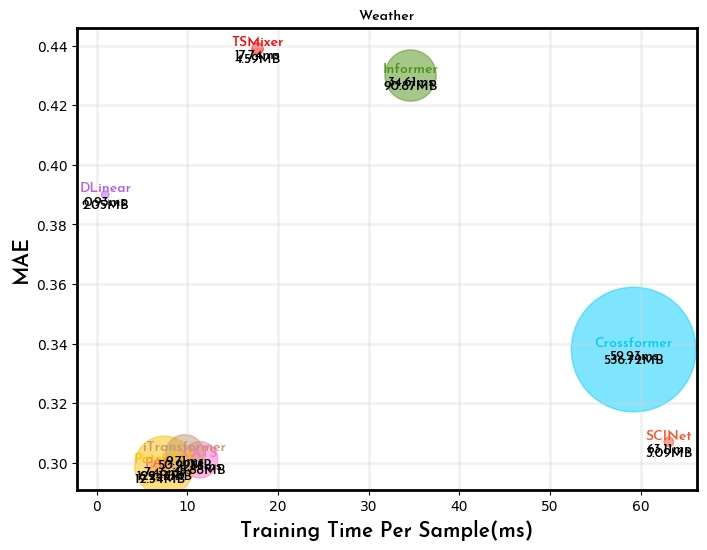

In [306]:


# Path to your TTF font file
font_path = '/notebooks/pytorch_timeseries/notebooks/trials/fonts/JosefinSans-Regular.ttf'
font_path = '/notebooks/pytorch_timeseries/notebooks/trials/fonts/JosefinSans-SemiBold.ttf'
# font_path = '/notebooks/pytorch_timeseries/notebooks/trials/fonts/PoetsenOne-Regular.ttf'
# Load the font
# font_prop = font_manager.FontProperties(fname=font_path)

# Set the global font properties
# rcParams['font.family'] = font_prop.get_name()
# # Set the font properties for various elements globally
# plt.rcParams['font.family'] = font_prop.get_name()
# plt.rcParams['font.sans-serif'] = [font_prop.get_name()]
# plt.rcParams['font.serif'] = [font_prop.get_name()]
# plt.rcParams['font.monospace'] = [font_prop.get_name()]

colors = [
"#ff71ce",
"#01cdfe",
"#b75dee",
"#4e9117",
"#f46671",
"#FFBF00",
"#ff5124",
"#ff0203",
"#C19A6B",
]
plt.rcParams['axes.linewidth'] = 2

plt.figure(figsize=(8, 6))
# plt.yscale('log') 
# plt.xscale('log') 
plt.scatter(x, y, s=s*15,  c=colors, alpha=0.5)


offsets = [
    (0,0), # CATS
    (0,0), # CATS
    (0,0), # CATS
    (0,0), # CATS
    (0,0), # CATS
    (0,0), # CATS
    (0,0), # CATS
    (0,0), # CATS
    (0,0), # CATS
    # (-11,0), # Crossformer
    # (0,0), # DLinear
    # (0,-0.0036), # Informer
    # (0,0.0043), # PAN
    # (15,0), # PatchTST
    # (0,-0.0045), # SCINet
    # (-6,0), # TSMixer
    # (4.4,-0.0043), # iTransformer

]

# yticks = [0.55,0.553 ,0.558, 0.56, 0.6]
# plt.yticks(yticks)

# # 添加标签
# for i, label in enumerate(df.keys()):
#     plt.annotate(f"{label}".format(), (x[i], y[i]), xytext=(x[i]+offsets[i][0], y[i]+s[i]/80+offsets[i][1]), c=colors[i], va='bottom', ha='center', fontproperties=font_prop)
for i, label in enumerate(df.keys()):
    plt.annotate(f"{label}".format(), (x[i], y[i]), xytext=(x[i]+offsets[i][0], y[i]+offsets[i][1]), c=colors[i], va='bottom', ha='center', fontproperties=font_prop)

# for i, label in enumerate(df.keys()):
#     plt.annotate(f"{round(df.iloc[1, :][i],2)}GB, {round(df.iloc[2, :][i],2)}ms".format(), (x[i], y[i]), xytext=(x[i]+offsets[i][0], y[i]+s[i]/80+offsets[i][1]), c='black', va='top', ha='center', fontproperties=font_prop)
for i, label in enumerate(df.keys()):
    plt.annotate(f"{round(s[i],2)}MB".format(), (x[i], y[i]), xytext=(x[i]+offsets[i][0], y[i]-0.0013+offsets[i][1]), c='black', va='top', ha='center', fontproperties=font_prop)
    
for i, label in enumerate(df.keys()):
    plt.annotate(f"{round(x[i],2)}ms".format(), (x[i], y[i]), xytext=(x[i]+offsets[i][0], y[i]+offsets[i][1]), c='black', va='top', ha='center', fontproperties=font_prop)

    
# 添加标题和坐标轴标签
plt.title(dataset, fontsize=15, fontproperties=font_prop)
plt.xlabel('Training Time Per Sample(ms)', fontsize=15, fontproperties=font_prop)
plt.ylabel('MAE', fontsize=15, fontproperties=font_prop)
# plt.grid(True)
plt.grid(which='major', axis='both', linestyle='-', alpha=0.3, color='lightgray', linewidth=2)
plt.savefig(f'./{dataset}.svg')
# 显示图表
plt.show()



## Traffic

In [54]:
import pandas as pd
# df_all = pd.read_csv('./profile.csv')
df_all = pd.read_csv('./traffic_profile.csv', delimiter='\t')
df_all.set_index(['dataset', 'model'], inplace=True)
df_all = df_all.sort_index()
df_all['parameters'] = df_all['parameters']/(1000)
df_all[ 'peak_memory'] = df_all[ 'peak_memory']/(1024**2)
df_all[ 'lowmem'] = df_all[ 'lowmem']/(1024**2)
df_all

peak_memory       lowmem  traintime  parameters  \
dataset  model                                                           
PEMS04   CATS            45.171875    44.791016  12.925653    1396.256   
         Crossformer     99.725586    99.725586  93.616116    3167.024   
         DLinear          0.281738     0.281738   1.132333       2.328   
         Informer        29.883301    29.784668  43.367136    7682.355   
         PAN             23.105957     6.813477   3.826895    1088.332   
         PatchTST       473.484863   457.192383  13.838032    3238.924   
         SCINet          84.353027    84.310547  45.974195   21130.734   
         TSMixer          9.666992     9.666992  14.584494    1588.556   
         iTransformer    85.469238    85.426758  17.170469   12666.380   
PEMS07   CATS           126.943359   125.850586  21.123268    1396.256   
         Crossformer    282.018555   282.018555  56.682110    3830.576   
         DLinear          0.809082     0.809082   1.211679       2.328   
         Informer        38.524902    38.241699  45.445335    9747.315   
         PAN             16.307617    16.307617   6.240225    1235.788   
         PatchTST      1308.930176  1308.808594  22.563076    3238.924   
         SCINet         668.364746   668.243164  53.136265  174702.702   
         TSMixer         51.303223    51.181641  16.535330   12564.812   
         iTransformer   373.628418   373.506836  24.079094   12666.380   
PEMS08   CATS            26.377930    26.166992  11.375036    1396.256   
         Crossformer     56.137695    56.137695  79.711592    3009.200   
         DLinear          0.156250     0.156250   0.855196       2.328   
         Informer        27.918945    27.864258  29.847479    7191.210   
         PAN              5.115723     5.092285   2.561152    1053.260   
         PatchTST       254.590332   254.566895  10.132823    3238.924   
         SCINet          25.137207    25.113770  49.431622    6484.612   
         TSMixer          5.804199     5.804199  12.104702     540.780   
         iTransformer    55.754395    55.730957  14.344839   12666.380   
PEMS_BAY CATS            49.948730    49.545898  13.530867    1396.256   
         Crossformer    107.769043   107.769043  51.945591    3187.760   
         DLinear          0.298340     0.298340   1.126385       2.328   
         Informer        31.012207    30.907227  47.338772    7746.885   
         PAN              7.131348     7.085938   3.386950    1092.940   
         PatchTST       484.532715   484.487305  13.248675    3238.924   
         SCINet          94.348633    94.303223  44.476342   23680.002   
         TSMixer         10.205078    10.159668  13.205600    1770.860   
         iTransformer    91.225098    90.277832  13.926855   12666.380   

                            MAE  
dataset  model                   
PEMS04   CATS          0.233033  
         Crossformer   0.195800  
         DLinear       0.231882  
         Informer      0.217287  
         PAN           0.186937  
         PatchTST      0.225957  
         SCINet        0.192939  
         TSMixer       0.211074  
         iTransformer  0.213184  
PEMS07   CATS          0.207520  
         Crossformer   0.185041  
         DLinear       0.213025  
         Informer      0.255717  
         PAN           0.174905  
         PatchTST      0.198949  
         SCINet        0.183150  
         TSMixer       0.201369  
         iTransformer  0.192097  
PEMS08   CATS          0.212145  
         Crossformer   0.188201  
         DLinear       0.219943  
         Informer      0.232581  
         PAN           0.172847  
         PatchTST      0.204467  
         SCINet        0.197738  
         TSMixer       0.217423  
         iTransformer  0.185036  
PEMS_BAY CATS          0.292106  
         Crossformer   0.255253  
         DLinear       0.310449  
         Informer      0.378959  
         PAN           0.259358  
         PatchTST      0.290571  
         SCINet     

### PEMS04

In [36]:
df = df_all.loc['PEMS04'].transpose()
# df = df_filtered.loc['ETTh1'].transpose()
x = df.iloc[2, :] # iter time
y = df.iloc[4, :] # MSE, MAE
s = df.iloc[0, :] # memory
# 绘制气泡图
df

model,CATS,Crossformer,DLinear,Informer,PAN,PatchTST,SCINet,TSMixer,iTransformer
peak_memory,45.171875,99.725586,0.281738,29.883301,23.105957,473.484863,84.353027,9.666992,85.469238
lowmem,44.791016,99.725586,0.281738,29.784668,6.813477,457.192383,84.310547,9.666992,85.426758
traintime,12.925653,93.616116,1.132333,43.367136,3.826895,13.838032,45.974195,14.584494,17.170469
parameters,1396.256000,3167.024000,2.328000,7682.355000,1088.332000,3238.924000,21130.734000,1588.556000,12666.380000
MAE,0.233033,0.195800,0.231882,0.217287,0.186937,0.225957,0.192939,0.211074,0.213184


In [37]:
df.keys()

Index(['CATS', 'Crossformer', 'DLinear', 'Informer', 'PAN', 'PatchTST',
       'SCINet', 'TSMixer', 'iTransformer'],
      dtype='object', name='model')

findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not

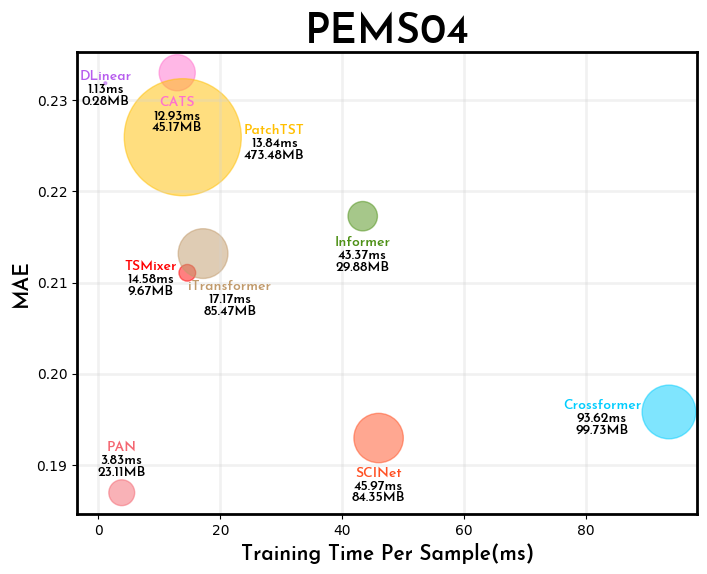

In [38]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.font_manager as fm
from matplotlib import font_manager, rcParams

from matplotlib import font_manager

# Path to your TTF font file
font_path = '/notebooks/pytorch_timeseries/notebooks/trials/fonts/JosefinSans-Regular.ttf'
font_path = '/notebooks/pytorch_timeseries/notebooks/trials/fonts/JosefinSans-SemiBold.ttf'
# font_path = '/notebooks/pytorch_timeseries/notebooks/trials/fonts/PoetsenOne-Regular.ttf'
# Load the font
# font_prop = font_manager.FontProperties(fname=font_path)

# Set the global font properties
# rcParams['font.family'] = font_prop.get_name()
# # Set the font properties for various elements globally
# plt.rcParams['font.family'] = font_prop.get_name()
# plt.rcParams['font.sans-serif'] = [font_prop.get_name()]
# plt.rcParams['font.serif'] = [font_prop.get_name()]
# plt.rcParams['font.monospace'] = [font_prop.get_name()]


# 生成随机数据
# x = np.random.rand(50)
# y = np.random.rand(50)
size = np.random.rand(50) * 50
# colors = np.random.rand(len(df.iloc[2, :]))
# colors = np.random.rand(len(df.iloc[2, :]), 3)

colors = [
"#ff71ce",
"#01cdfe",
"#b75dee",
"#4e9117",
"#f46671",
"#FFBF00",
"#ff5124",
"#ff0203",
"#C19A6B",
]
plt.rcParams['axes.linewidth'] = 2

plt.figure(figsize=(8, 6))
# plt.yscale('log') 
# plt.xscale('log') 
plt.scatter(x, y, s=s*15,  c=colors, alpha=0.5)


offsets = [
    # (20,0.38), # HSTGNN
    # (-30,1), # ESG
    # (0,0.8), # TPGNN
    # (-18,0), # MTGNN
    # (0,1), # GraphWavenet
    # (15,-0.7), # GMAN
    # (0,0.8), # STGCN
    # (25,0), #DCRNN
    
    (0,-0.004), # CATS
    (-11,0), # Crossformer
    (0,0), # DLinear
    (0,-0.0036), # Informer
    (0,0.0043), # PAN
    (15,0), # PatchTST
    (0,-0.0045), # SCINet
    (-6,0), # TSMixer
    (4.4,-0.0043), # iTransformer

]

# yticks = [0.55,0.553 ,0.558, 0.56, 0.6]
# plt.yticks(yticks)

# # 添加标签
# for i, label in enumerate(df.keys()):
#     plt.annotate(f"{label}".format(), (x[i], y[i]), xytext=(x[i]+offsets[i][0], y[i]+s[i]/80+offsets[i][1]), c=colors[i], va='bottom', ha='center', fontproperties=font_prop)
for i, label in enumerate(df.keys()):
    plt.annotate(f"{label}".format(), (x[i], y[i]), xytext=(x[i]+offsets[i][0], y[i]+offsets[i][1]), c=colors[i], va='bottom', ha='center', fontproperties=font_prop)

# for i, label in enumerate(df.keys()):
#     plt.annotate(f"{round(df.iloc[1, :][i],2)}GB, {round(df.iloc[2, :][i],2)}ms".format(), (x[i], y[i]), xytext=(x[i]+offsets[i][0], y[i]+s[i]/80+offsets[i][1]), c='black', va='top', ha='center', fontproperties=font_prop)
for i, label in enumerate(df.keys()):
    plt.annotate(f"{round(s[i],2)}MB".format(), (x[i], y[i]), xytext=(x[i]+offsets[i][0], y[i]-0.0013+offsets[i][1]), c='black', va='top', ha='center', fontproperties=font_prop)
    
for i, label in enumerate(df.keys()):
    plt.annotate(f"{round(x[i],2)}ms".format(), (x[i], y[i]), xytext=(x[i]+offsets[i][0], y[i]+offsets[i][1]), c='black', va='top', ha='center', fontproperties=font_prop)

    
# 添加标题和坐标轴标签
plt.title('PEMS04', fontproperties=title_font_prop)
plt.xlabel('Training Time Per Sample(ms)', fontsize=15, fontproperties=font_prop)
plt.ylabel('MAE', fontsize=15, fontproperties=font_prop)
# plt.grid(True)
plt.grid(which='major', axis='both', linestyle='-', alpha=0.3, color='lightgray', linewidth=2)
plt.savefig('./PEMS04.svg', bbox_inches='tight')
# 显示图表
plt.show()



### PEMS07

In [39]:
df = df_all.loc['PEMS07'].transpose()
# df = df_filtered.loc['ETTh1'].transpose()
x = df.iloc[2, :] # iter time
y = df.iloc[4, :] # MSE, MAE
s = df.iloc[0, :] # memory
# 绘制气泡图
df

model,CATS,Crossformer,DLinear,Informer,PAN,PatchTST,SCINet,TSMixer,iTransformer
peak_memory,126.943359,282.018555,0.809082,38.524902,16.307617,1308.930176,668.364746,51.303223,373.628418
lowmem,125.850586,282.018555,0.809082,38.241699,16.307617,1308.808594,668.243164,51.181641,373.506836
traintime,21.123268,56.682110,1.211679,45.445335,6.240225,22.563076,53.136265,16.535330,24.079094
parameters,1396.256000,3830.576000,2.328000,9747.315000,1235.788000,3238.924000,174702.702000,12564.812000,12666.380000
MAE,0.207520,0.185041,0.213025,0.255717,0.174905,0.198949,0.183150,0.201369,0.192097


findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not

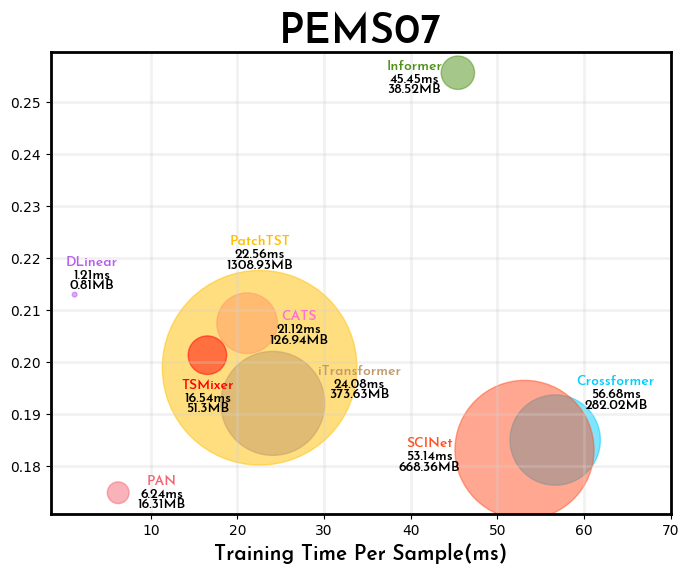

In [41]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.font_manager as fm
from matplotlib import font_manager, rcParams

from matplotlib import font_manager

# Path to your TTF font file
font_path = '/notebooks/pytorch_timeseries/notebooks/trials/fonts/JosefinSans-Regular.ttf'
font_path = '/notebooks/pytorch_timeseries/notebooks/trials/fonts/JosefinSans-SemiBold.ttf'
# font_path = '/notebooks/pytorch_timeseries/notebooks/trials/fonts/PoetsenOne-Regular.ttf'
# Load the font
# font_prop = font_manager.FontProperties(fname=font_path)

# Set the global font properties
# rcParams['font.family'] = font_prop.get_name()
# # Set the font properties for various elements globally
# plt.rcParams['font.family'] = font_prop.get_name()
# plt.rcParams['font.sans-serif'] = [font_prop.get_name()]
# plt.rcParams['font.serif'] = [font_prop.get_name()]
# plt.rcParams['font.monospace'] = [font_prop.get_name()]


# 生成随机数据
# x = np.random.rand(50)
# y = np.random.rand(50)
size = np.random.rand(50) * 50
# colors = np.random.rand(len(df.iloc[2, :]))
# colors = np.random.rand(len(df.iloc[2, :]), 3)

colors = [
"#ff71ce",
"#01cdfe",
"#b75dee",
"#4e9117",
"#f46671",
"#FFBF00",
"#ff5124",
"#ff0203",
"#C19A6B",
]
plt.rcParams['axes.linewidth'] = 2

plt.figure(figsize=(8, 6))
# plt.yscale('log') 
# plt.xscale('log') 
plt.scatter(x, y, s=s*15,  c=colors, alpha=0.5)


offsets = [
    # (20,0.38), # HSTGNN
    # (-30,1), # ESG
    # (0,0.8), # TPGNN
    # (-18,0), # MTGNN
    # (0,1), # GraphWavenet
    # (15,-0.7), # GMAN
    # (0,0.8), # STGCN
    # (25,0), #DCRNN
    
    (6,0), # CATS
    (7,0.01), # Crossformer
    (2,0.005), # DLinear
    (-5,0), # Informer
    (5,0.001), # PAN
    (0,0.023), # PatchTST
    (-11,0), # SCINet
    (0,-0.007), # TSMixer
    (10,0.005), # iTransformer

]

# yticks = [0.55,0.553 ,0.558, 0.56, 0.6]
# plt.yticks(yticks)

# # 添加标签
# for i, label in enumerate(df.keys()):
#     plt.annotate(f"{label}".format(), (x[i], y[i]), xytext=(x[i]+offsets[i][0], y[i]+s[i]/80+offsets[i][1]), c=colors[i], va='bottom', ha='center', fontproperties=font_prop)
for i, label in enumerate(df.keys()):
    plt.annotate(f"{label}".format(), (x[i], y[i]), xytext=(x[i]+offsets[i][0], y[i]+offsets[i][1]), c=colors[i], va='bottom', ha='center', fontproperties=font_prop)

# for i, label in enumerate(df.keys()):
#     plt.annotate(f"{round(df.iloc[1, :][i],2)}GB, {round(df.iloc[2, :][i],2)}ms".format(), (x[i], y[i]), xytext=(x[i]+offsets[i][0], y[i]+s[i]/80+offsets[i][1]), c='black', va='top', ha='center', fontproperties=font_prop)
for i, label in enumerate(df.keys()):
    plt.annotate(f"{round(s[i],2)}MB".format(), (x[i], y[i]), xytext=(x[i]+offsets[i][0], y[i]-0.0020+offsets[i][1]), c='black', va='top', ha='center', fontproperties=font_prop)
    
for i, label in enumerate(df.keys()):
    plt.annotate(f"{round(x[i],2)}ms".format(), (x[i], y[i]), xytext=(x[i]+offsets[i][0], y[i]+offsets[i][1]), c='black', va='top', ha='center', fontproperties=font_prop)

ticks = [10, 20, 30, 40, 50, 60, 70]
plt.xticks(ticks)
# 添加标题和坐标轴标签
plt.title('PEMS07', fontproperties=title_font_prop)
plt.xlabel('Training Time Per Sample(ms)', fontsize=15, fontproperties=font_prop)
# plt.ylabel('MAE', fontsize=15, fontproperties=font_prop)
# plt.grid(True)
plt.grid(which='major', axis='both', linestyle='-', alpha=0.3, color='lightgray', linewidth=2)
plt.savefig('./PEMS07.svg', bbox_inches='tight')
# 显示图表
plt.show()



### PEMS08

In [55]:
df = df_all.loc['PEMS08'].transpose()
# df = df_filtered.loc['ETTh1'].transpose()
x = df.iloc[2, :] # iter time
y = df.iloc[4, :] # MSE, MAE
s = df.iloc[0, :] # memory
# 绘制气泡图
df

model,CATS,Crossformer,DLinear,Informer,PAN,PatchTST,SCINet,TSMixer,iTransformer
peak_memory,26.377930,56.137695,0.156250,27.918945,5.115723,254.590332,25.137207,5.804199,55.754395
lowmem,26.166992,56.137695,0.156250,27.864258,5.092285,254.566895,25.113770,5.804199,55.730957
traintime,11.375036,79.711592,0.855196,29.847479,2.561152,10.132823,49.431622,12.104702,14.344839
parameters,1396.256000,3009.200000,2.328000,7191.210000,1053.260000,3238.924000,6484.612000,540.780000,12666.380000
MAE,0.212145,0.188201,0.219943,0.232581,0.172847,0.204467,0.197738,0.217423,0.185036


findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not

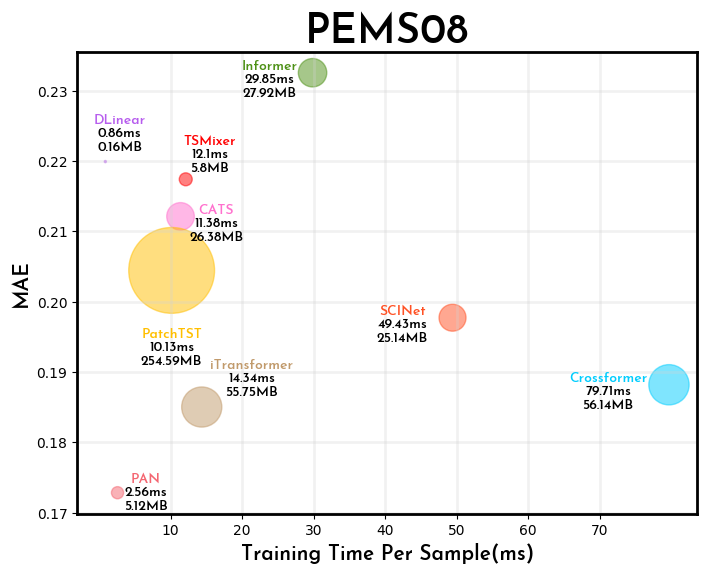

In [57]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.font_manager as fm
from matplotlib import font_manager, rcParams


# Path to your TTF font file
font_path = '/notebooks/pytorch_timeseries/notebooks/trials/fonts/JosefinSans-Regular.ttf'
font_path = '/notebooks/pytorch_timeseries/notebooks/trials/fonts/JosefinSans-SemiBold.ttf'
# font_path = '/notebooks/pytorch_timeseries/notebooks/trials/fonts/PoetsenOne-Regular.ttf'
# Load the font
# font_prop = font_manager.FontProperties(fname=font_path)

# Set the global font properties
# rcParams['font.family'] = font_prop.get_name()
# # Set the font properties for various elements globally
# plt.rcParams['font.family'] = font_prop.get_name()
# plt.rcParams['font.sans-serif'] = [font_prop.get_name()]
# plt.rcParams['font.serif'] = [font_prop.get_name()]
# plt.rcParams['font.monospace'] = [font_prop.get_name()]


# 生成随机数据
# x = np.random.rand(50)
# y = np.random.rand(50)
size = np.random.rand(50) * 50
# colors = np.random.rand(len(df.iloc[2, :]))
# colors = np.random.rand(len(df.iloc[2, :]), 3)

colors = [
"#ff71ce",
"#01cdfe",
"#b75dee",
"#4e9117",
"#f46671",
"#FFBF00",
"#ff5124",
"#ff0203",
"#C19A6B",
]
plt.rcParams['axes.linewidth'] = 2

plt.figure(figsize=(8, 6))
# plt.yscale('log') 
# plt.xscale('log') 
plt.scatter(x, y, s=s*15,  c=colors, alpha=0.5)


offsets = [
    # (20,0.38), # HSTGNN
    # (-30,1), # ESG
    # (0,0.8), # TPGNN
    # (-18,0), # MTGNN
    # (0,1), # GraphWavenet
    # (15,-0.7), # GMAN
    # (0,0.8), # STGCN
    # (25,0), #DCRNN
    
    (5,0), # CATS
    (-8.5,0), # Crossformer
    (2,0.005), # DLinear
    (-6,0), # Informer
    (4,0.001), # PAN
    (0,-0.01), # PatchTST
    (-7,0), # SCINet
    (3.4,0.0045), # TSMixer
    (7,0.005), # iTransformer

]

# yticks = [0.55,0.553 ,0.558, 0.56, 0.6]
# plt.yticks(yticks)

# # 添加标签
# for i, label in enumerate(df.keys()):
#     plt.annotate(f"{label}".format(), (x[i], y[i]), xytext=(x[i]+offsets[i][0], y[i]+s[i]/80+offsets[i][1]), c=colors[i], va='bottom', ha='center', fontproperties=font_prop)
for i, label in enumerate(df.keys()):
    plt.annotate(f"{label}".format(), (x[i], y[i]), xytext=(x[i]+offsets[i][0], y[i]+offsets[i][1]), c=colors[i], va='bottom', ha='center', fontproperties=font_prop)

# for i, label in enumerate(df.keys()):
#     plt.annotate(f"{round(df.iloc[1, :][i],2)}GB, {round(df.iloc[2, :][i],2)}ms".format(), (x[i], y[i]), xytext=(x[i]+offsets[i][0], y[i]+s[i]/80+offsets[i][1]), c='black', va='top', ha='center', fontproperties=font_prop)
for i, label in enumerate(df.keys()):
    plt.annotate(f"{round(s[i],2)}MB".format(), (x[i], y[i]), xytext=(x[i]+offsets[i][0], y[i]-0.0020+offsets[i][1]), c='black', va='top', ha='center', fontproperties=font_prop)
    
for i, label in enumerate(df.keys()):
    plt.annotate(f"{round(x[i],2)}ms".format(), (x[i], y[i]), xytext=(x[i]+offsets[i][0], y[i]+offsets[i][1]), c='black', va='top', ha='center', fontproperties=font_prop)

# ticks = [10, 20, 30, 40, 50, 60, 70]
plt.xticks(ticks)
# 添加标题和坐标轴标签
plt.title('PEMS08', fontproperties=title_font_prop)
plt.xlabel('Training Time Per Sample(ms)', fontsize=15, fontproperties=font_prop)
plt.ylabel('MAE', fontsize=15, fontproperties=font_prop)
# plt.grid(True)
plt.grid(which='major', axis='both', linestyle='-', alpha=0.3, color='lightgray', linewidth=2)
plt.savefig('./PEMS08.svg', bbox_inches='tight')
# 显示图表
plt.show()



### PEMSBAY

In [44]:
df = df_all.loc['PEMS_BAY'].transpose()
# df = df_filtered.loc['ETTh1'].transpose()
x = df.iloc[2, :] # iter time
y = df.iloc[4, :] # MSE, MAE
s = df.iloc[0, :] # memory
# 绘制气泡图
df

model,CATS,Crossformer,DLinear,Informer,PAN,PatchTST,SCINet,TSMixer,iTransformer
peak_memory,49.948730,107.769043,0.298340,31.012207,7.131348,484.532715,94.348633,10.205078,91.225098
lowmem,49.545898,107.769043,0.298340,30.907227,7.085938,484.487305,94.303223,10.159668,90.277832
traintime,13.530867,51.945591,1.126385,47.338772,3.386950,13.248675,44.476342,13.205600,13.926855
parameters,1396.256000,3187.760000,2.328000,7746.885000,1092.940000,3238.924000,23680.002000,1770.860000,12666.380000
MAE,0.292106,0.255253,0.310449,0.378959,0.259358,0.290571,0.274722,0.291177,0.274593


findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not found.
findfont: Font family 'Josefin Sans' not

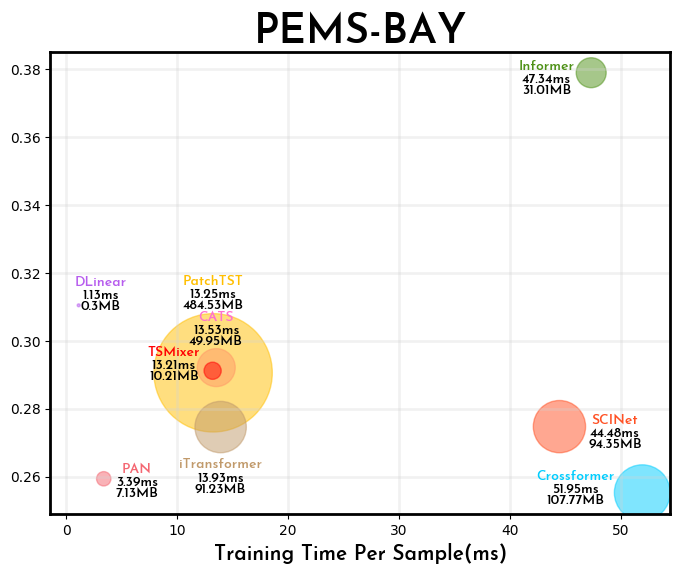

In [46]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.font_manager as fm
from matplotlib import font_manager, rcParams


# Path to your TTF font file
font_path = '/notebooks/pytorch_timeseries/notebooks/trials/fonts/JosefinSans-Regular.ttf'
font_path = '/notebooks/pytorch_timeseries/notebooks/trials/fonts/JosefinSans-SemiBold.ttf'
# font_path = '/notebooks/pytorch_timeseries/notebooks/trials/fonts/PoetsenOne-Regular.ttf'
# Load the font
# font_prop = font_manager.FontProperties(fname=font_path)

# Set the global font properties
# rcParams['font.family'] = font_prop.get_name()
# # Set the font properties for various elements globally
# plt.rcParams['font.family'] = font_prop.get_name()
# plt.rcParams['font.sans-serif'] = [font_prop.get_name()]
# plt.rcParams['font.serif'] = [font_prop.get_name()]
# plt.rcParams['font.monospace'] = [font_prop.get_name()]


# 生成随机数据
# x = np.random.rand(50)
# y = np.random.rand(50)
size = np.random.rand(50) * 50
# colors = np.random.rand(len(df.iloc[2, :]))
# colors = np.random.rand(len(df.iloc[2, :]), 3)

colors = [
"#ff71ce",
"#01cdfe",
"#b75dee",
"#4e9117",
"#f46671",
"#FFBF00",
"#ff5124",
"#ff0203",
"#C19A6B",
]
plt.rcParams['axes.linewidth'] = 2

plt.figure(figsize=(8, 6))
# plt.yscale('log') 
# plt.xscale('log') 
plt.scatter(x, y, s=s*15,  c=colors, alpha=0.5)


offsets = [
    # (20,0.38), # HSTGNN
    # (-30,1), # ESG
    # (0,0.8), # TPGNN
    # (-18,0), # MTGNN
    # (0,1), # GraphWavenet
    # (15,-0.7), # GMAN
    # (0,0.8), # STGCN
    # (25,0), #DCRNN
    
    (0,0.013), # CATS
    (-6,0.003), # Crossformer
    (2,0.005), # DLinear
    (-4,0), # Informer
    (3,0.001), # PAN
    (0,0.025), # PatchTST
    (5,0), # SCINet
    (-3.5,0.0035), # TSMixer
    (0,-0.013), # iTransformer

]

# yticks = [0.55,0.553 ,0.558, 0.56, 0.6]
# plt.yticks(yticks)

# # 添加标签
# for i, label in enumerate(df.keys()):
#     plt.annotate(f"{label}".format(), (x[i], y[i]), xytext=(x[i]+offsets[i][0], y[i]+s[i]/80+offsets[i][1]), c=colors[i], va='bottom', ha='center', fontproperties=font_prop)
for i, label in enumerate(df.keys()):
    plt.annotate(f"{label}".format(), (x[i], y[i]), xytext=(x[i]+offsets[i][0], y[i]+offsets[i][1]), c=colors[i], va='bottom', ha='center', fontproperties=font_prop)

# for i, label in enumerate(df.keys()):
#     plt.annotate(f"{round(df.iloc[1, :][i],2)}GB, {round(df.iloc[2, :][i],2)}ms".format(), (x[i], y[i]), xytext=(x[i]+offsets[i][0], y[i]+s[i]/80+offsets[i][1]), c='black', va='top', ha='center', fontproperties=font_prop)
for i, label in enumerate(df.keys()):
    plt.annotate(f"{round(s[i],2)}MB".format(), (x[i], y[i]), xytext=(x[i]+offsets[i][0], y[i]-0.0033+offsets[i][1]), c='black', va='top', ha='center', fontproperties=font_prop)
    
for i, label in enumerate(df.keys()):
    plt.annotate(f"{round(x[i],2)}ms".format(), (x[i], y[i]), xytext=(x[i]+offsets[i][0], y[i]+offsets[i][1]), c='black', va='top', ha='center', fontproperties=font_prop)

# ticks = [10, 20, 30, 40, 50, 60, 70]
# plt.xticks(ticks)
# 添加标题和坐标轴标签
plt.title('PEMS-BAY', fontproperties=title_font_prop)
plt.xlabel('Training Time Per Sample(ms)', fontsize=15, fontproperties=font_prop)
# plt.ylabel('MAE', fontsize=15, fontproperties=font_prop)
# plt.grid(True)
plt.grid(which='major', axis='both', linestyle='-', alpha=0.3, color='lightgray', linewidth=2)
plt.savefig('./PEMS_BAY.svg', bbox_inches='tight')
# 显示图表
plt.show()

